<div>
<img src="https://i.ibb.co/v3CvVz9/udd-short.png" width="150"/>
    
</div>

# Ciencia de redes: Taller 3

<br>
    <strong>Universidad del Desarrollo</strong><br>
    <em>Profesores: Cristian Candia-Castro Vallejos - Adolfo Fuentes Jofré  
      
**Nombre Estudiante(s)**:
- Cristhian Solís

 </em><br>

**Objetivo**: comprender, implementar y analizar las propiedades de los modelos de redes de **Erdős-Rényi**, **Watts-Strogatz**, **Barabási-Albert** y el **Modelo Aleatorio (GNM)** .


#### Importando Modulos Requeridos

In [3]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# Configurar el entorno de Matplotlib para plots más claros
plt.style.use('ggplot')

In [23]:
# Definir una función para analizar y visualizar una red
def analyze_and_plot(G, title):
    # Grado promedio
    avg_degree = sum(dict(G.degree()).values()) / len(G.nodes)
    print(f"{title}:")
    print(f"- Número de nodos: {len(G.nodes)}")
    print(f"- Número de enlaces: {len(G.edges)}")
    print(f"- Grado promedio: {avg_degree:.2f}")
    print(f"- Clustering promedio: {nx.average_clustering(G):.4f}")
    print("- Componentes conectadas:", nx.number_connected_components(G))
    print ("--")
    
    # Calcular la distribución de grados
    degrees = [degree for _, degree in G.degree()]
    plt.hist(degrees, bins=np.arange(0, max(degrees)+1), alpha=0.7, label='Grado')
    plt.title(f"Distribución de Grados - {title}")
    plt.xlabel("Grado")
    plt.ylabel("Frecuencia")
    plt.show()

    # Dibujar la red
    plt.figure(figsize=(8, 8))
    pos = nx.spring_layout(G, seed=42)  # Disposición de los nodos
    nx.draw(G, pos, node_size=50, edge_color='gray', node_color='blue', alpha=0.7)
    plt.title(f"{title}")
    plt.show()

#### **1. Modelo de Erdős-Rényi**
- **Tarea**: Cambia los parámetros \( p \) (probabilidad de conexión) y \( n \) (número de nodos) para generar redes con diferentes características.
  - Genera redes con \( p = 0.01 \), \( p = 0.1 \), y \( p = 0.5 \), manteniendo \( n = 100 \).


Erdős-Rényi (n = 100, p = 0.01):
- Número de nodos: 100
- Número de enlaces: 36
- Grado promedio: 0.72
- Clustering promedio: 0.0000
- Componentes conectadas: 64
--


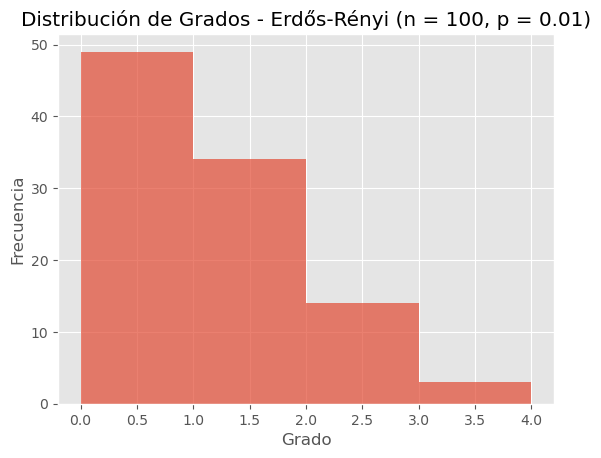

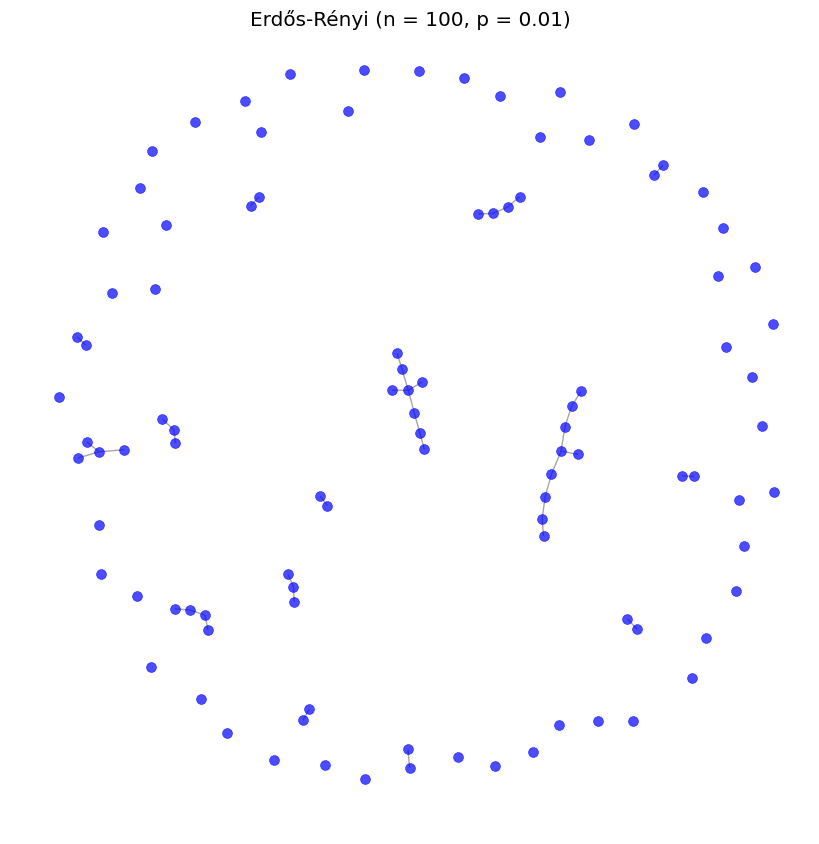

Erdős-Rényi (n = 100, p = 0.1):
- Número de nodos: 100
- Número de enlaces: 478
- Grado promedio: 9.56
- Clustering promedio: 0.1056
- Componentes conectadas: 1
--


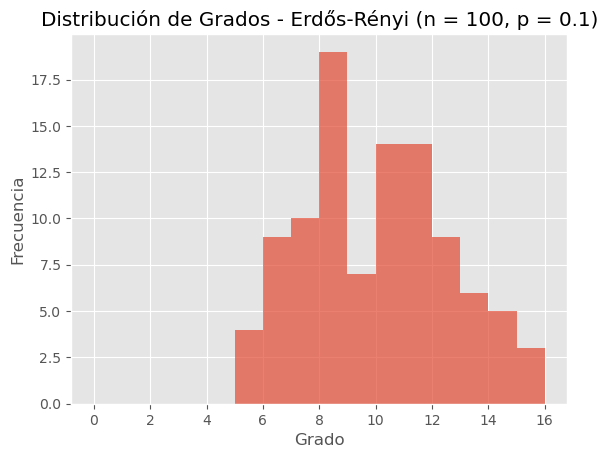

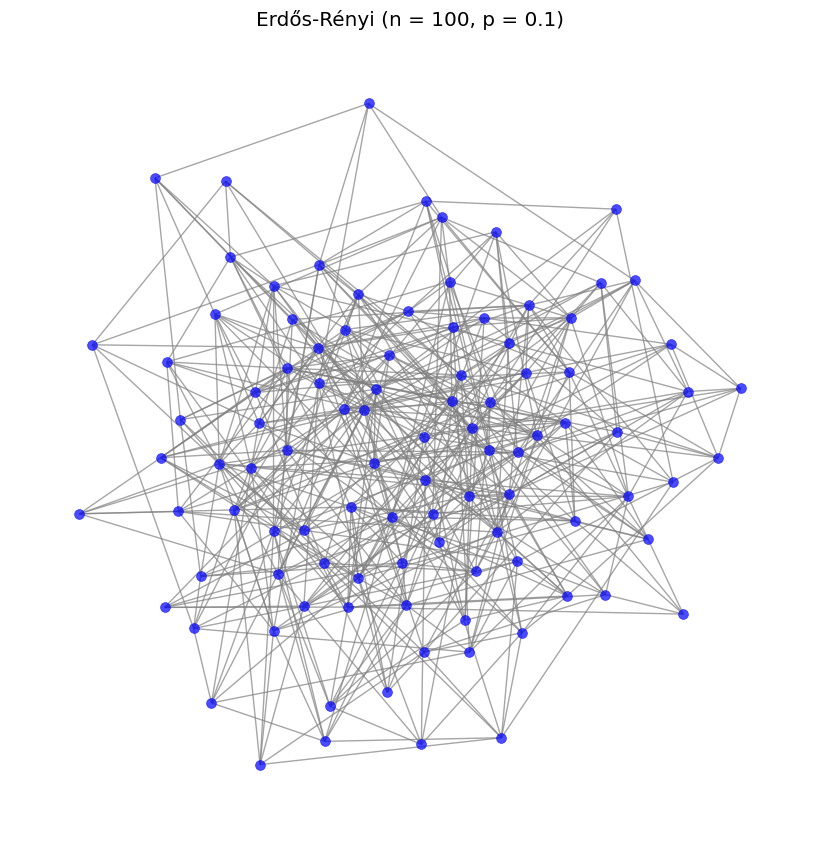

Erdős-Rényi (n = 100, p = 0.5):
- Número de nodos: 100
- Número de enlaces: 2545
- Grado promedio: 50.90
- Clustering promedio: 0.5124
- Componentes conectadas: 1
--


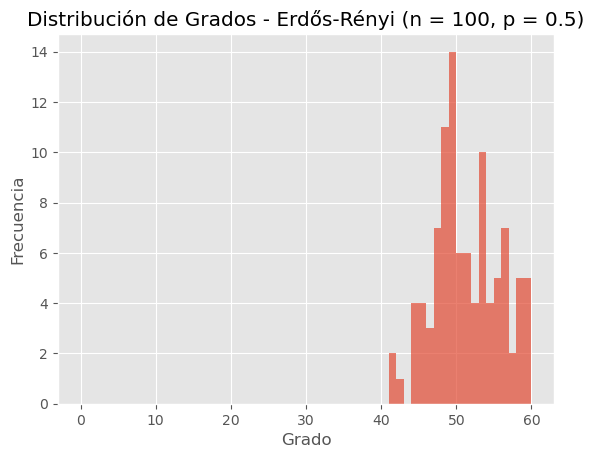

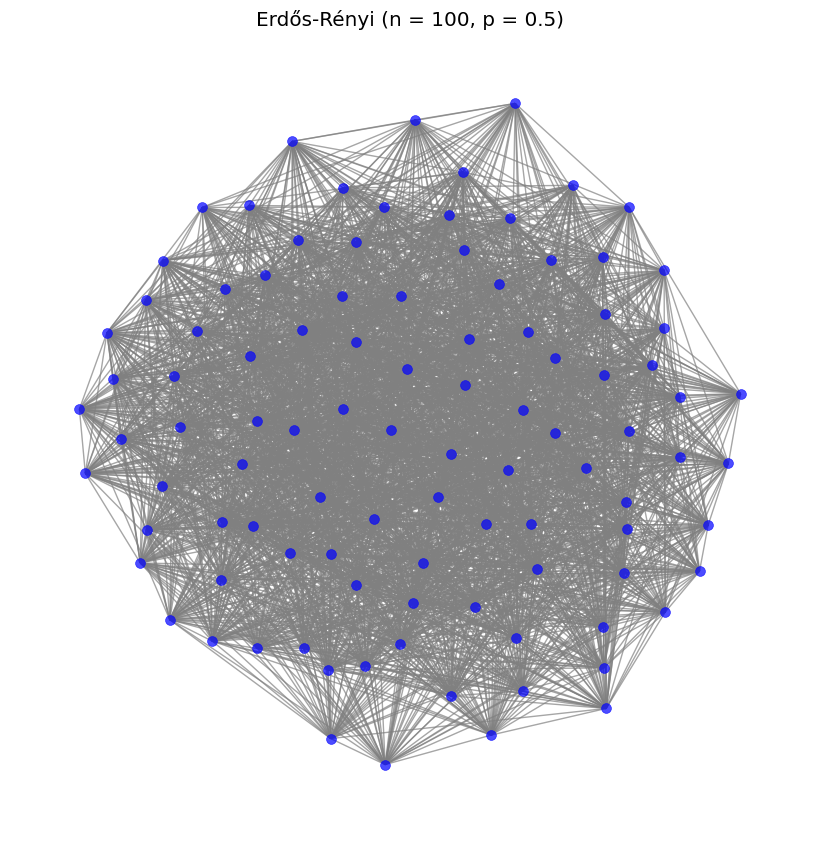

In [24]:
# Parámetros para crear la red Erdős-Rényi
n = 100  # Número de nodos
p_values = [0.01, 0.1, 0.5]  # Diferentes probabilidades de conexión

# Crear y visualizar las redes para diferentes valores de p
for p in p_values:
    G_er = nx.erdos_renyi_graph(n, p)
    analyze_and_plot(G_er, f"Erdős-Rényi (n = {n}, p = {p})")


#### Resumen Erdős-Rényi**

 Título                               | Número de nodos | Número de enlaces | Grado promedio | Clustering promedio | Componentes conectadas |
|--------------------------------------|-----------------|-------------------|----------------|---------------------|------------------------|
| Erdős-Rényi (n = 100, p = 0.01)     | 100             | 36                | 0.72           | 0.0000              | 64                     |
| Erdős-Rényi (n = 100, p = 0.1)      | 100             | 478               | 9.56           | 0.1056              | 1                      |
| Erdős-Rényi (n = 100, p = 0.5)      | 100             | 2545              | 50.90          | 0.5124              | 1                      |


- **Pregunta**: ¿Cómo afecta \( p \) a la conectividad global y al clustering promedio de la red? Explica tus observaciones basándote en las métricas calculadas.

- **Respuesta**: A medida que aumento la probabilidad determinada, la conectividad de la red mejora, dado a que es más probable que se generen enlaces entre los nodos. Del mismo modo, el clustering promedio igual aumenta, reflejo de la densidad de las conexiones lo que implica que a mayor probabilidad, es una red más conectada.

---

#### **2. Modelo de Watts-Strogatz**
- **Tarea**: Genera redes con diferentes probabilidades de reconexión (\ p \) manteniendo \( n = 100 \) y \( k = 4 \):
  - \( p = 0 \), \( p = 0.1 \), y \( p = 1.0 \).


Watts-Strogatz - p = 0:
- Número de nodos: 100
- Número de enlaces: 200
- Grado promedio: 4.00
- Clustering promedio: 0.5000
- Componentes conectadas: 1
--


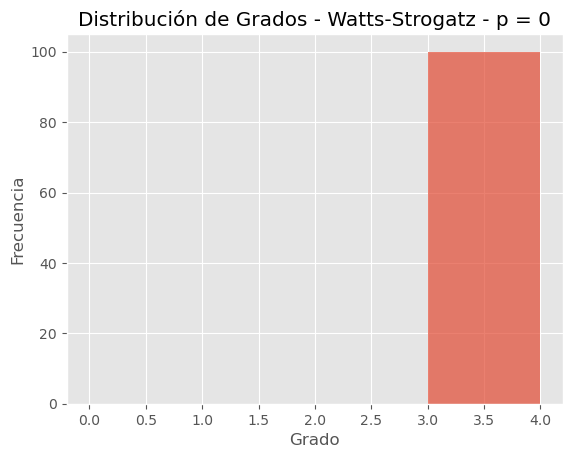

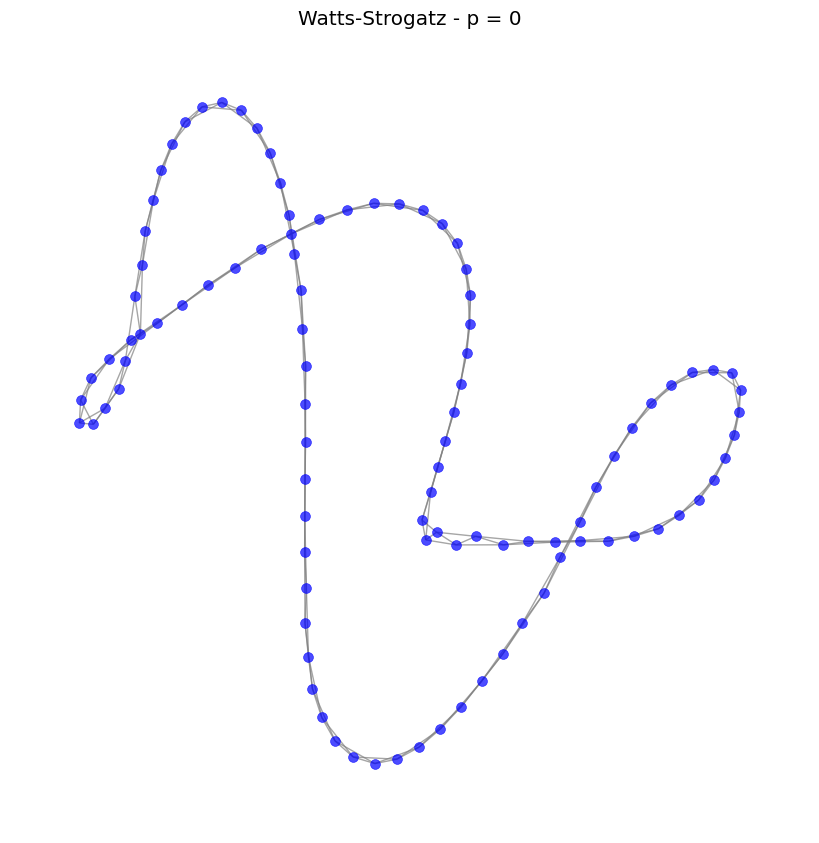

- Camino promedio (p = 0): 12.88


Watts-Strogatz - p = 0.1:
- Número de nodos: 100
- Número de enlaces: 200
- Grado promedio: 4.00
- Clustering promedio: 0.4017
- Componentes conectadas: 1
--


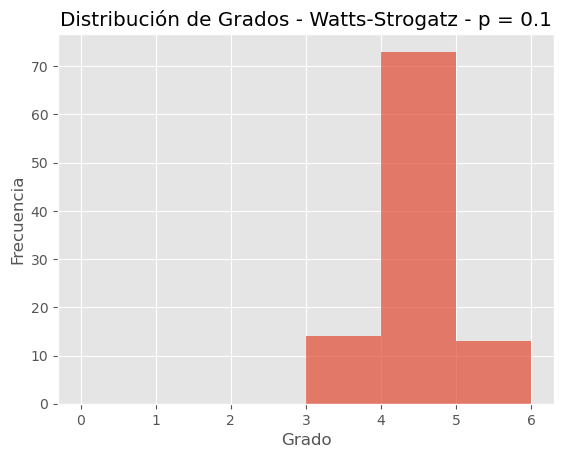

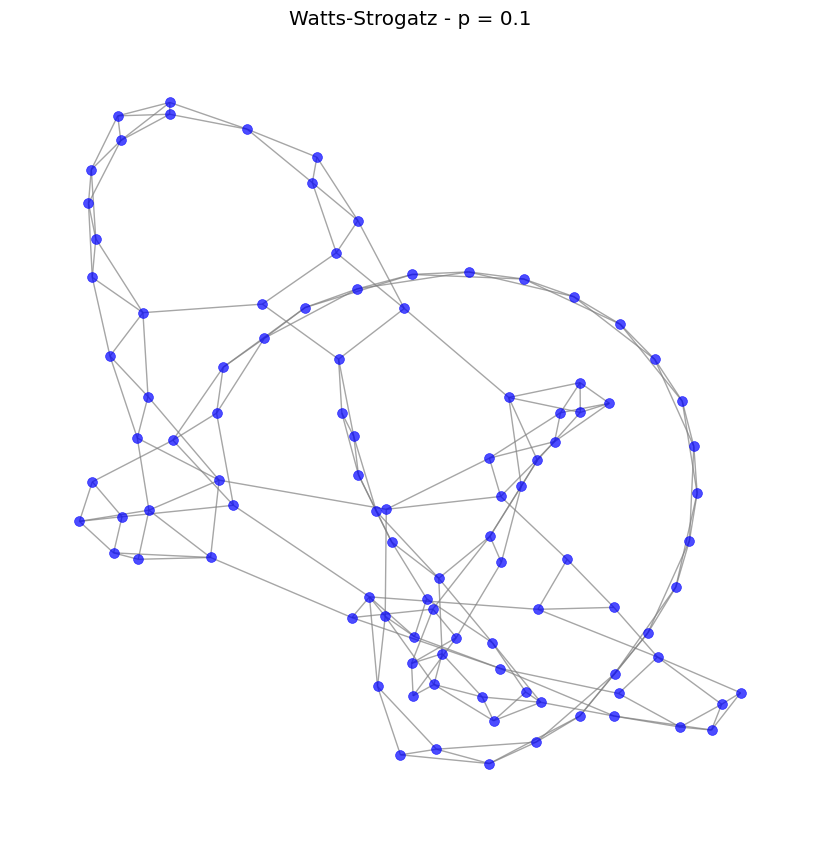

- Camino promedio (p = 0.1): 6.00


Watts-Strogatz - p = 1.0:
- Número de nodos: 100
- Número de enlaces: 200
- Grado promedio: 4.00
- Clustering promedio: 0.0139
- Componentes conectadas: 1
--


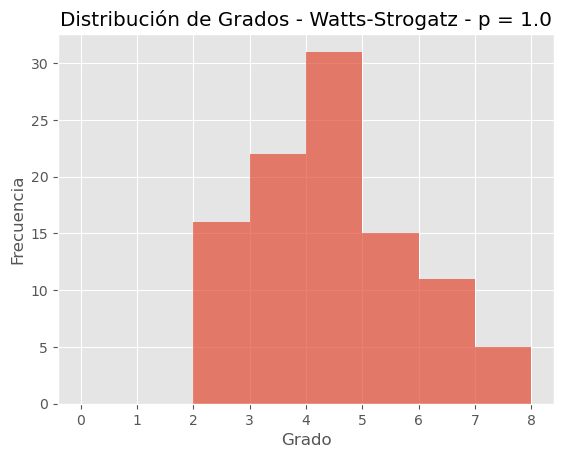

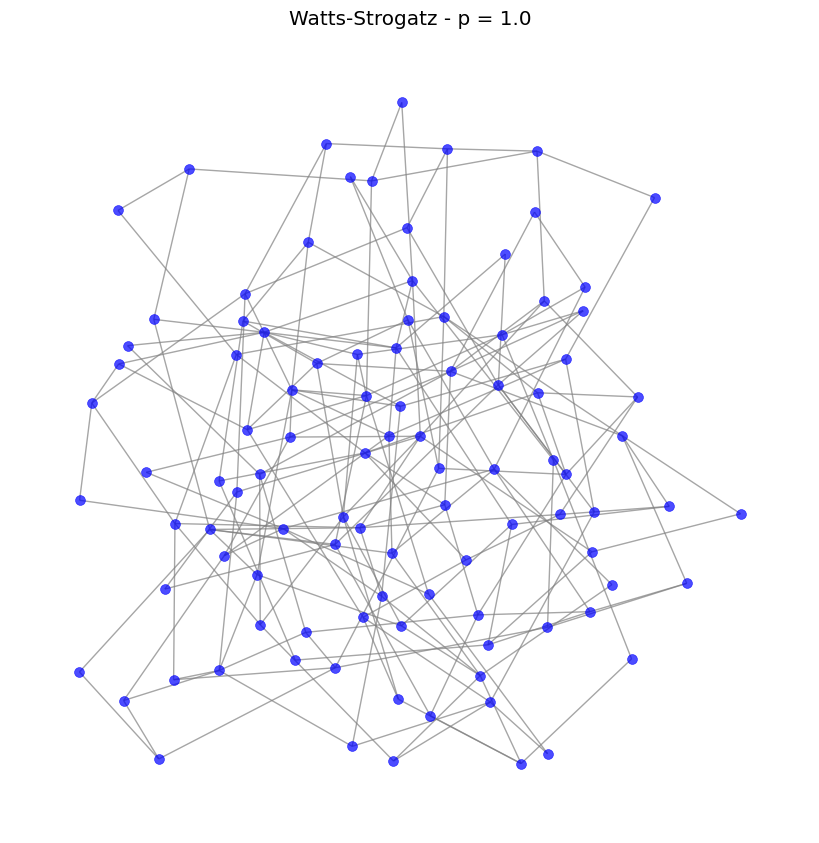

- Camino promedio (p = 1.0): 3.42




In [31]:
# Parámetros de la red
n = 100  # Número de nodos
k = 4    # Grado promedio inicial

# Listar las probabilidades de reconexión
probabilidades = [0, 0.1, 1.0]

# Generar y analizar redes para cada probabilidad de reconexión
for p in probabilidades:
    G_ws = nx.watts_strogatz_graph(n, k, p)
    analyze_and_plot(G_ws, f"Watts-Strogatz - p = {p}")
    # Calcular el camino promedio
    avg_path_length = nx.average_shortest_path_length(G_ws)
    print(f"- Camino promedio (p = {p}): {avg_path_length:.2f}")
    print("\n") 

# Análisis de Redes Watts-Strogatz

| **p**   | **Número de nodos** | **Número de enlaces** | **Grado promedio** | **Clustering promedio** | **Componentes conectadas** | **Camino promedio** |
|---------|---------------------|-----------------------|--------------------|-------------------------|---------------------------|---------------------|
| 0       | 100                 | 200                   | 4.00               | 0.5000                  | 1                         | 12.88               |
| 0.1     | 100                 | 200                   | 4.00               | 0.4017                  | 1                         | 6.00                |
| 1.0     | 100                 | 200                   | 4.00               | 0.0139                  | 1                         | 3.42                |



- **Pregunta**: ¿Qué sucede con el coeficiente de clustering y el camino promedio a medida que \( p \) aumenta? Relaciona esto con las propiedades de "mundo pequeño".

- **Respuesta**: A medida que la probabilidad de reconexión aumenta, el coeficiente de clustering disminuye, dado que la conexión entre nodos distantes se incrementa, es decir, es menos probable que  los nodos esten conectados entre nodos vecinos cercanos. Mientras que, el camino promedio a medida que la probabilidad de reconexión aumenta,  se reduce, dado a que se generan enlaces entre nodos más lejanos, es decir, se crean "atajos" para nodos disntantes.
---


#### **3. Modelo de Barabási-Albert**
- **Tarea**: Cambia el parámetro \( m \) (enlaces por nodo nuevo) y analiza su impacto:
  - Genera redes con \( m = 2 \), \( m = 4 \), y \( m = 6 \), manteniendo \( n = 100 \).
  - Genera el gráfico log-log para la distribución de grados de cada red.

Barabási-Albert - m = 2:
- Número de nodos: 100
- Número de enlaces: 196
- Grado promedio: 3.92
- Clustering promedio: 0.1280
- Componentes conectadas: 1
--


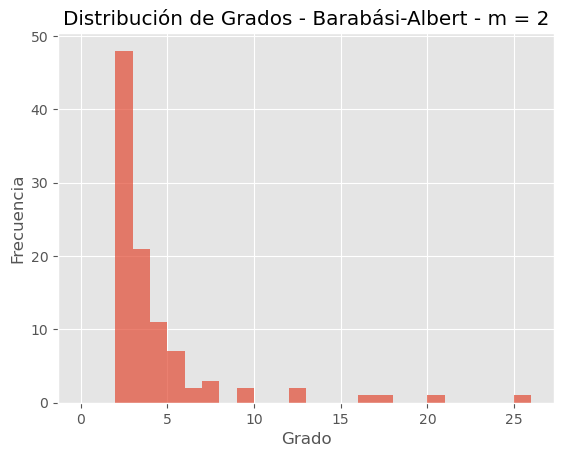

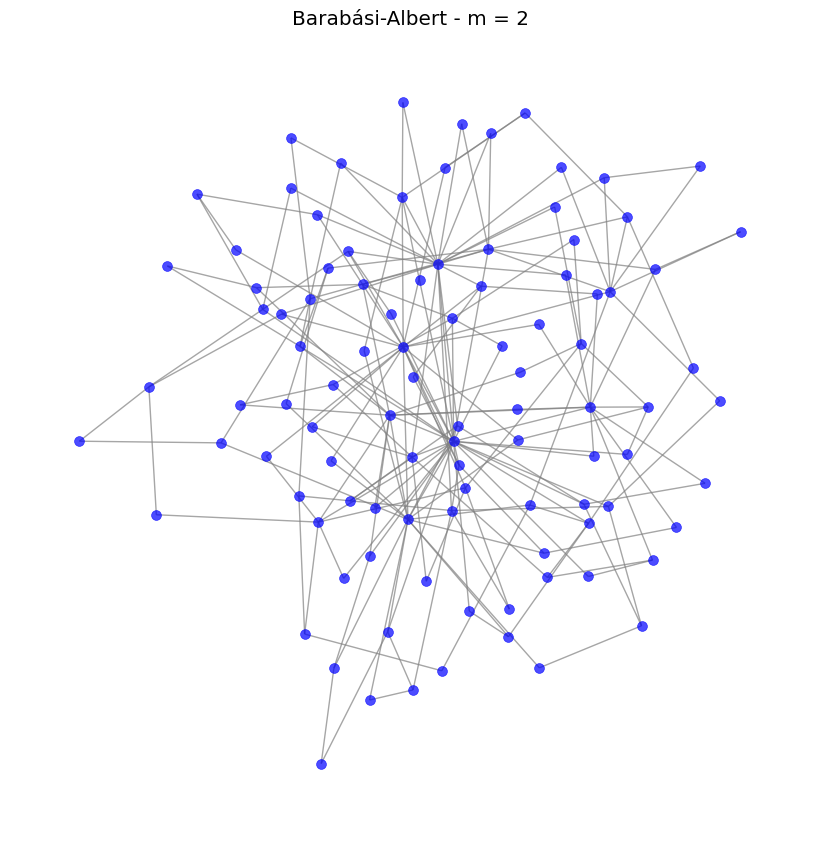

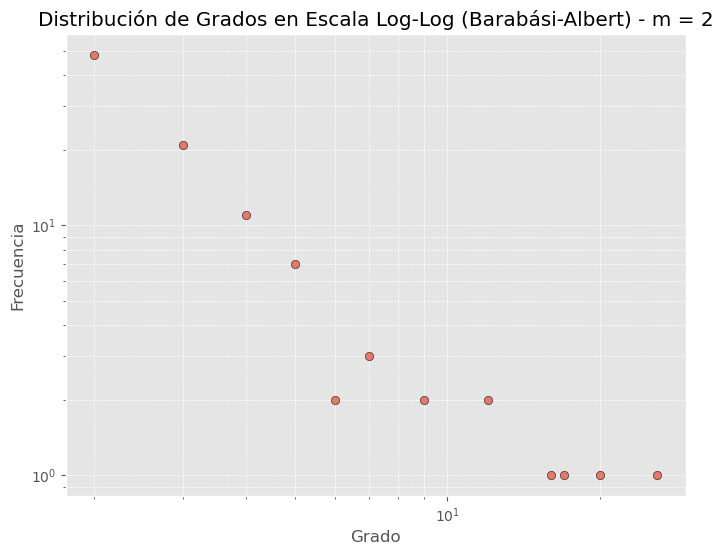

Barabási-Albert - m = 4:
- Número de nodos: 100
- Número de enlaces: 384
- Grado promedio: 7.68
- Clustering promedio: 0.1653
- Componentes conectadas: 1
--


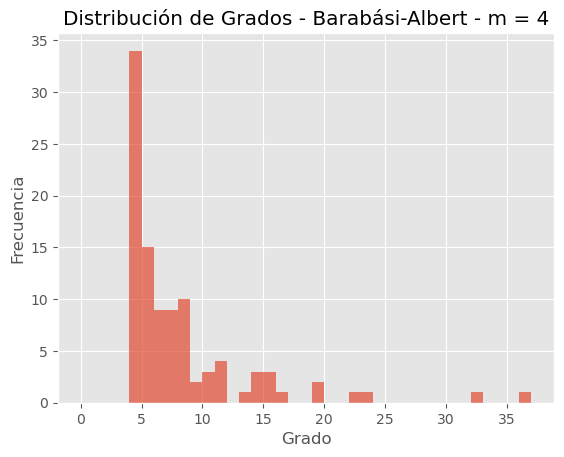

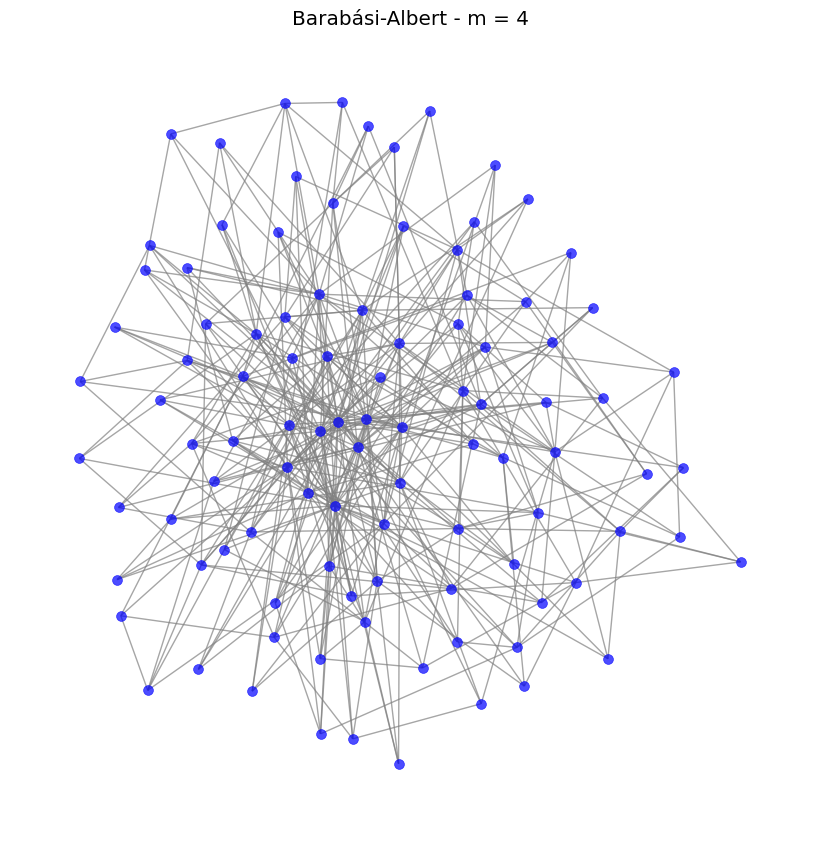

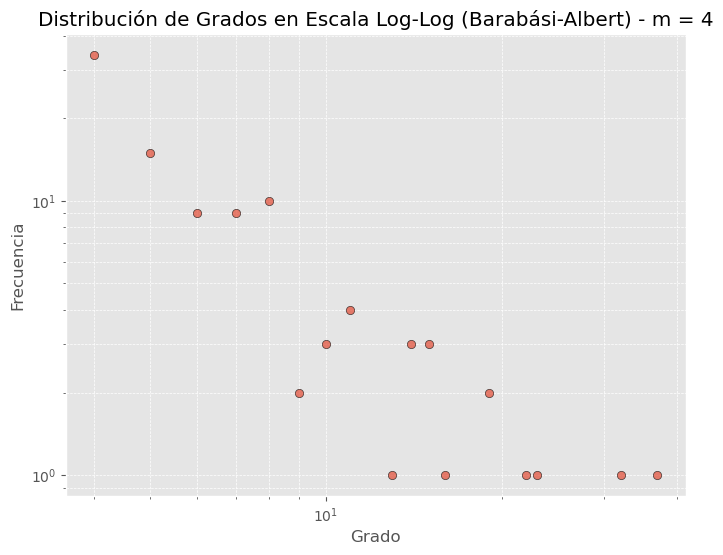

Barabási-Albert - m = 6:
- Número de nodos: 100
- Número de enlaces: 564
- Grado promedio: 11.28
- Clustering promedio: 0.2096
- Componentes conectadas: 1
--


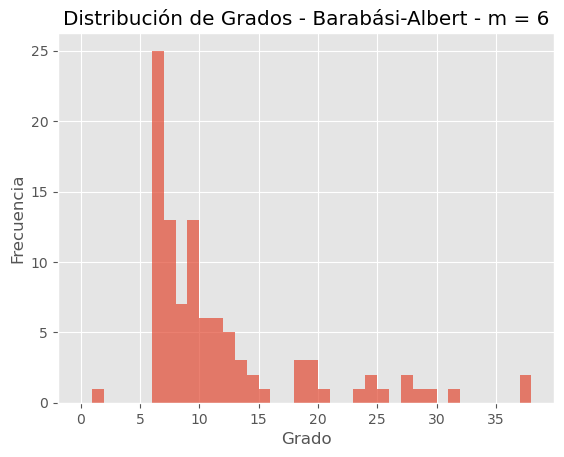

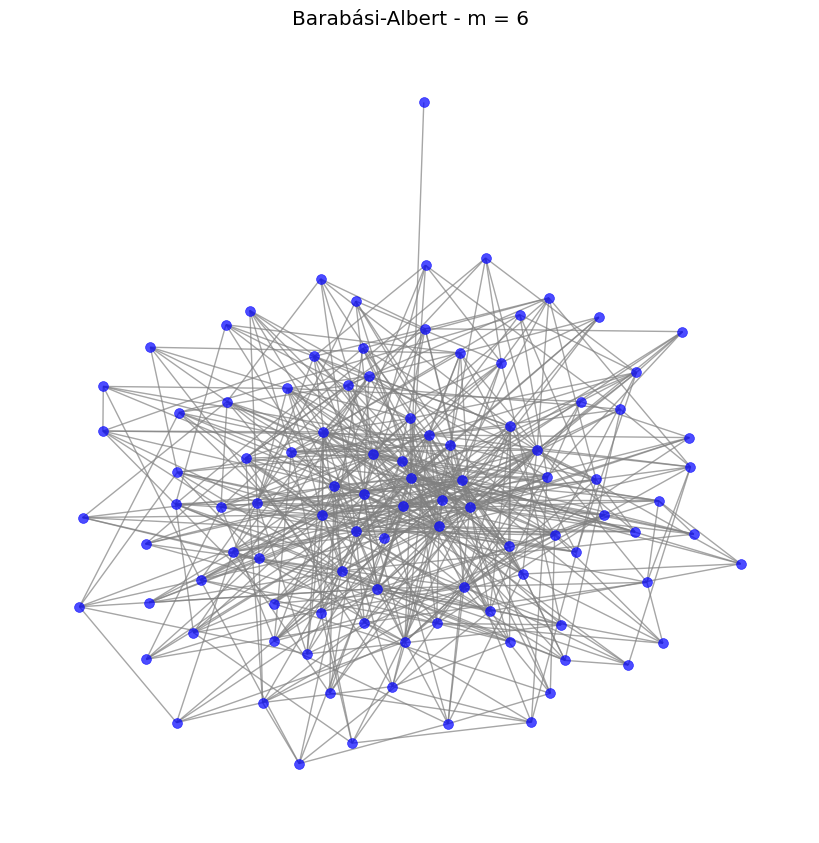

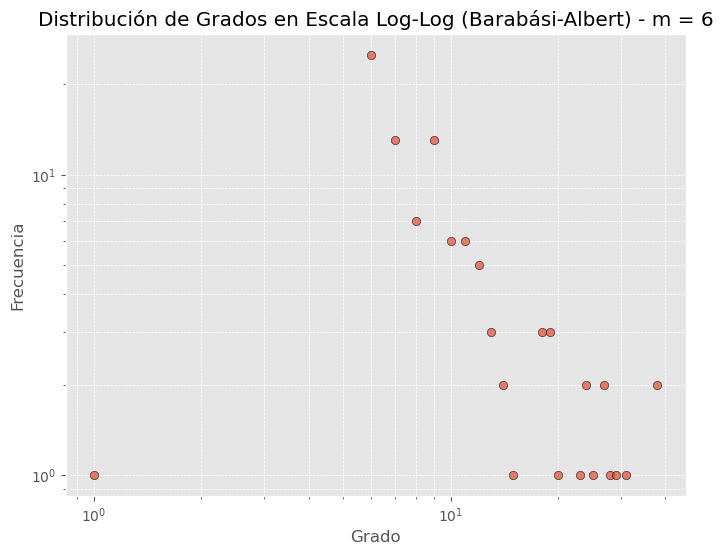

In [33]:
# Parámetros de la red
n = 100  # Número de nodos

# Listar los valores de m
valores_m = [2, 4, 6]

# Generar y analizar redes para cada valor de m
for m in valores_m:
    # Crear la red Barabási-Albert
    G_ba = nx.barabasi_albert_graph(n, m)
    analyze_and_plot(G_ba, f"Barabási-Albert - m = {m}")
    
    # Crear el gráfico log-log
    degrees = [degree for _, degree in G_ba.degree()]
    degree_counts = np.bincount(degrees)
    degree_values = np.arange(len(degree_counts))
    plt.figure(figsize=(8, 6))
    plt.scatter(degree_values[degree_counts > 0], degree_counts[degree_counts > 0], alpha=0.7, edgecolor='k')
    plt.xscale('log')
    plt.yscale('log')
    plt.title(f"Distribución de Grados en Escala Log-Log (Barabási-Albert) - m = {m}")
    plt.xlabel("Grado")
    plt.ylabel("Frecuencia")
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    plt.show()

| **Red**                     | **Número de nodos** | **Número de enlaces** | **Grado promedio** | **Clustering promedio** | **Componentes conectadas** |
|-----------------------------|---------------------|-----------------------|--------------------|-------------------------|----------------------------|
| **Barabási-Albert - m = 2**  | 100                 | 196                   | 3.92               | 0.1280                  | 1                          |
| **Barabási-Albert - m = 4**  | 100                 | 384                   | 7.68               | 0.1653                  | 1                          |
| **Barabási-Albert - m = 6**  | 100                 | 564                   | 11.28              | 0.2096                  | 1                          |



- **Pregunta**: ¿Qué observas sobre la formación de hubs y la forma de la distribución de grados a medida que varía \( m \)?

- **Respuesta**: A diferencia de los modelos anteriores, para redes Barabási-Albert, es más probable la aparición de hubs debido a la logica que define este modelo, en donde el mecanismo de preferencia de enlaces, los nuevos nodos tienen a enlazarce con los nodos que ya poseen mayor grado por lo cual genera el fenomeno de algunos nodos con un número de conexiones mucho mayor que la mayoría. Mientras que, a medida que aumenta (m), los nodos inciales tienen mayor predominancia en con un mayor valor de grado maximo, es decir, más concentrada en los hubs. 
---

#### **5. Comparaciones Globales**

**Completado en resumenenes por sección**
Resumen de las métricas clave (clustering promedio, número de componentes conectadas, etc.) para los cuatro modelos. 
-
- **Pregunta Final**:
  - ¿Qué diferencias fundamentales observas entre los cuatro modelos?

Aunque todos los modelos incluyen algún grado de aleatoriedad, no todos tienen la misma base estructural para generar la red. Por ejemplo, los modelos de Watts-Strogatz y Barabási-Albert combinan aleatoriedad con reglas estructurales específicas que los distinguen del modelo clásico de Erdős-Rényi, esto permite por ejemplo la aparición dee  hubs, por lo que, la distribucción de grados varia entre modelos.

  - Si quisieras modelar una red social real, ¿qué modelo usarías y por qué?
Si quisiera modelar una red social real, usaria el modelo de Barabási-Albert dado a que refleja de mejor manera la realidad social, en donde poco nodos (hubs) pueden conectar con grandes partes de la red, simil a un influencer en redes sociales. En resumen bajo este modelo, si cada nodo corresponde a un usuario, existirian usuario atipos con pocos grados, usuarios normales con conexiones medias y hubs que abarcan una gran cantidad de relaciones.